# DATA EXPLORATION 

In [82]:
from pathlib import Path
import random
import librosa
import torch
import os
import numpy as np
import pandas as pd
import shutil

## Exploring Training Folder

In [11]:
dataPath = 'C:/Users/fares/OneDrive/Bureau/kaggleBirds/data/BirdClef2024/train_audio/'
x = len(dataPath)
species_dict = {}
size_dict = {}
i = 0

for path in Path(dataPath).glob('*'):
    # because path is object not string
    path_in_str = str(path)
    species = path_in_str[x:]
    species_dict[species] = i
    s = 0
    for ele in os.scandir(path_in_str):
        s += os.path.getsize(ele)
    size_dict[species] = s/(1024*1024)
    i += 1
sorted_size_dict = sorted(size_dict.items(), key=lambda x:x[1], reverse=True)
converted_dict = dict(sorted_size_dict)



In [44]:
print(converted_dict)
l = list(size_dict.values())
print('number of birds : ', len(l))
print('total size in Gb : ', sum(l)/1024)
print('min : ', min(l))
print('max : ', max(l))
print('mean : ', np.mean(l))
print('quantile 25% : ', np.quantile(l,0.25))
print('quantile 50% : ', np.quantile(l,0.5))
print('quantile 75% : ', np.quantile(l,0.75))
# print(list(size_dict.values()))

{'blrwar1': 713.2781734466553, 'houspa': 311.5318603515625, 'grewar3': 237.24135494232178, 'commyn': 224.52898788452148, 'hoopoe': 203.07315158843994, 'comros': 190.77192974090576, 'eucdov': 163.22731113433838, 'bkwsti': 161.5487289428711, 'barswa': 146.78772068023682, 'graher1': 146.1665744781494, 'bcnher': 130.87054538726807, 'lirplo': 124.10521793365479, 'grywag': 118.85448551177979, 'zitcis1': 118.04619407653809, 'eaywag1': 116.118821144104, 'rorpar': 113.88611125946045, 'comkin1': 112.4832124710083, 'comgre': 105.90146255493164, 'woosan': 105.55930423736572, 'eurcoo': 102.02696323394775, 'comsan': 96.04480648040771, 'grnsan': 95.98876094818115, 'litgre1': 92.04837608337402, 'commoo3': 87.32533168792725, 'grtdro1': 86.76984310150146, 'bkskit1': 80.21471691131592, 'rewbul': 78.61901092529297, 'wemhar1': 78.32897472381592, 'litegr': 75.54301834106445, 'categr': 73.14439964294434, 'putbab1': 72.81355571746826, 'whiter2': 72.80091381072998, 'comtai1': 72.72722244262695, 'asikoe2': 72.1

## Exploring Train_metadata.csv

In [40]:
def strToList(secondaryLabels):
    if secondaryLabels[0] == '[':
        return secondaryLabels.replace(' ','')[1:-1].split(',')
    else:
        return secondaryLabels.replace(' ','')[2:-2].split(',')

dataPath = 'C:/Users/fares/OneDrive/Bureau/kaggleBirds/data/BirdClef2024/train_audio/'
train_metadata = pd.read_csv('C:/Users/fares/OneDrive/Bureau/kaggleBirds/data/BirdClef2024/train_metadata.csv')
NewSizeDict = {}
listOfBirds = list(converted_dict.keys())
for key in listOfBirds:
    NewSizeDict[key] = 0
for x in train_metadata.itertuples():
    if x.secondary_labels != '[]':
        fileSize = os.path.getsize(Path(dataPath + x.filename))/(1024*1024)
        for bird in strToList(x.secondary_labels):
            if bird[1:-1] in listOfBirds:
                NewSizeDict[bird[1:-1]] += fileSize
            else:
                print("bird not found")
    

bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found
bird not found


In [45]:
print(NewSizeDict)
l = list(NewSizeDict.values())
print('total size in Gb : ', sum(l)/1024)
print('min : ', min(l))
print('max : ', max(l))
print('mean : ', np.mean(l))
print('quantile 25% : ', np.quantile(l,0.25))
print('quantile 50% : ', np.quantile(l,0.5))
print('quantile 75% : ', np.quantile(l,0.75))

{'blrwar1': 6.283745765686035, 'houspa': 102.40098667144775, 'grewar3': 6.092229843139648, 'commyn': 41.97463893890381, 'hoopoe': 6.12772274017334, 'comros': 12.939372062683105, 'eucdov': 121.43699645996094, 'bkwsti': 11.129454612731934, 'barswa': 24.7664852142334, 'graher1': 14.520487785339355, 'bcnher': 3.4963865280151367, 'lirplo': 2.569669723510742, 'grywag': 4.712719917297363, 'zitcis1': 14.046738624572754, 'eaywag1': 18.394898414611816, 'rorpar': 26.646089553833008, 'comkin1': 7.46884822845459, 'comgre': 8.50961971282959, 'woosan': 19.976089477539062, 'eurcoo': 22.405871391296387, 'comsan': 8.296342849731445, 'grnsan': 3.234543800354004, 'litgre1': 8.024065017700195, 'commoo3': 15.828451156616211, 'grtdro1': 8.022299766540527, 'bkskit1': 0, 'rewbul': 18.97142219543457, 'wemhar1': 0.056893348693847656, 'litegr': 4.381871223449707, 'categr': 2.397212028503418, 'putbab1': 8.00403118133545, 'whiter2': 1.8236579895019531, 'comtai1': 22.10057258605957, 'asikoe2': 33.150943756103516, 'b

In [50]:
# To only run once to copy the files where a secondary bird exists to their respective folders

# dataPath = 'C:/Users/fares/OneDrive/Bureau/kaggleBirds/data/BirdClef2024/train_audio/'
# dataPathDest = 'C:/Users/fares/OneDrive/Bureau/kaggleBirds/data/BirdClef2024/train_audio_with_secondary_labels/'
# for x in train_metadata.itertuples():
#     if x.secondary_labels != '[]':
#         file = Path(dataPath + x.filename)
#         for bird in strToList(x.secondary_labels):
#             b = bird[1:-1]
#             if b in listOfBirds:
#                 destination = Path(dataPathDest + b + '/')
#                 print(file)
#                 print(destination)
#                 shutil.copy(file,destination)

C:\Users\fares\OneDrive\Bureau\kaggleBirds\data\BirdClef2024\train_audio\asbfly\XC347938.ogg
C:\Users\fares\OneDrive\Bureau\kaggleBirds\data\BirdClef2024\train_audio_with_secondary_labels\comior1
C:\Users\fares\OneDrive\Bureau\kaggleBirds\data\BirdClef2024\train_audio\asbfly\XC399102.ogg
C:\Users\fares\OneDrive\Bureau\kaggleBirds\data\BirdClef2024\train_audio_with_secondary_labels\asikoe2
C:\Users\fares\OneDrive\Bureau\kaggleBirds\data\BirdClef2024\train_audio\asbfly\XC412228.ogg
C:\Users\fares\OneDrive\Bureau\kaggleBirds\data\BirdClef2024\train_audio_with_secondary_labels\commyn
C:\Users\fares\OneDrive\Bureau\kaggleBirds\data\BirdClef2024\train_audio\asbfly\XC441145.ogg
C:\Users\fares\OneDrive\Bureau\kaggleBirds\data\BirdClef2024\train_audio_with_secondary_labels\asikoe2
C:\Users\fares\OneDrive\Bureau\kaggleBirds\data\BirdClef2024\train_audio\asbfly\XC554430.ogg
C:\Users\fares\OneDrive\Bureau\kaggleBirds\data\BirdClef2024\train_audio_with_secondary_labels\barswa
C:\Users\fares\OneDriv

In [52]:
# Verification

dataPath = 'C:/Users/fares/OneDrive/Bureau/kaggleBirds/data/BirdClef2024/train_audio_with_secondary_labels/'
x = len(dataPath)
species_dict = {}
size_dict = {}
i = 0

for path in Path(dataPath).glob('*'):
    # because path is object not string
    path_in_str = str(path)
    species = path_in_str[x:]
    species_dict[species] = i
    s = 0
    for ele in os.scandir(path_in_str):
        s += os.path.getsize(ele)
    size_dict[species] = s/(1024*1024)
    i += 1
sorted_size_dict = sorted(size_dict.items(), key=lambda x:x[1], reverse=True)
converted_dict = dict(sorted_size_dict)

print(converted_dict)
l = list(size_dict.values())
print('number of birds : ', len(l))
print('total size in Gb : ', sum(l)/1024)
print('min : ', min(l))
print('max : ', max(l))
print('mean : ', np.mean(l))
print('quantile 25% : ', np.quantile(l,0.25))
print('quantile 50% : ', np.quantile(l,0.5))
print('quantile 75% : ', np.quantile(l,0.75))
# print(list(size_dict.values()))


{'blrwar1': 715.645133972168, 'houspa': 411.8267879486084, 'eucdov': 279.323410987854, 'commyn': 266.47997188568115, 'grewar3': 243.2596492767334, 'hoopoe': 207.61924362182617, 'comros': 202.56533813476562, 'bkwsti': 172.67818355560303, 'barswa': 171.55420589447021, 'graher1': 160.68706226348877, 'rorpar': 139.2626142501831, 'eaywag1': 134.51371955871582, 'bcnher': 134.27387046813965, 'zitcis1': 130.83119583129883, 'lirplo': 126.67488765716553, 'woosan': 125.53539371490479, 'eurcoo': 123.49243640899658, 'grywag': 122.97263717651367, 'comkin1': 119.5657730102539, 'comgre': 114.3643159866333, 'asikoe2': 105.3424825668335, 'comsan': 104.34114933013916, 'commoo3': 103.10298442840576, 'litgre1': 100.07244110107422, 'grnsan': 99.22330474853516, 'comtai1': 94.82779502868652, 'grtdro1': 94.79214286804199, 'rewbul': 93.5107593536377, 'houcro1': 85.39198780059814, 'labcro1': 84.14291381835938, 'putbab1': 80.28478908538818, 'bkskit1': 80.21471691131592, 'litegr': 79.92488956451416, 'wemhar1': 78.

## Visualization of spectrogram

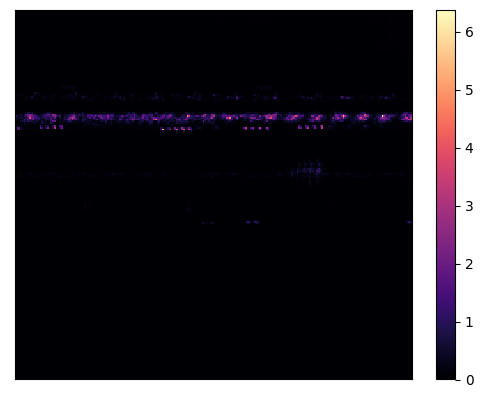

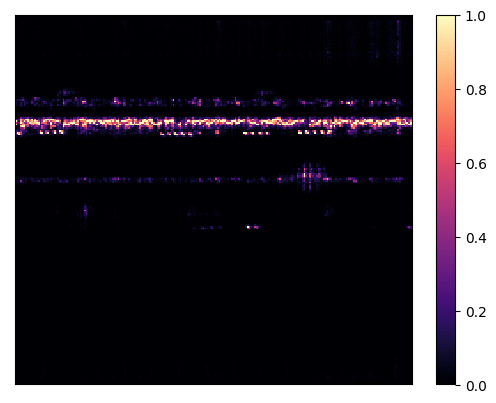

In [83]:
import matplotlib.pyplot as plt

steps_per_subtrack = 160000
n_mels=224
hop_length=716
fmax=16000
audio_file = r'C:\Users\fares\OneDrive\Bureau\kaggleBirds\data\Birdclef2024\unlabeled_soundscapes\5330966.ogg' #5330966 53947867
data, samplerate = librosa.load(audio_file, sr=32000)
chunks = []
track_length = data.shape[0]
for i in range(track_length // steps_per_subtrack):
    chunks.append(data[i*steps_per_subtrack:(i+1)*steps_per_subtrack])
S = librosa.feature.melspectrogram(y=chunks[3], sr=samplerate, n_mels=n_mels, hop_length=hop_length, fmax=fmax)
    # mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S))
plt.figure()
librosa.display.specshow(S)
plt.colorbar()
S = librosa.feature.melspectrogram(y=chunks[3], sr=samplerate, n_mels=n_mels, hop_length=hop_length, fmax=fmax)
S = librosa.util.normalize(S)
plt.figure()
librosa.display.specshow(S)
plt.colorbar()